# Peak Sets and Genes

Using the links found using Cicero, look within peak sets to see if links are more likely within peak sets. Also try to link peaks/peak sets to genes.

In [81]:
library(cicero)
library(Matrix)
library(ggplot2)
library(scales)
library(GenomicFeatures)
library(reshape2)

In [706]:
gz = "./out/20200417_default_20200220_n74838/coaccess.gt0.1.tsv.gz"
high_conns = read.table(gz, header=F, sep='\t')
colnames(high_conns) = c("Peak1", "Peak2", "coaccess")
high_conns$distance = abs(as.integer(lapply(strsplit(as.character(high_conns$Peak1), "_"), "[[", 2)) - as.integer(lapply(strsplit(as.character(high_conns$Peak2), "_"), "[[", 2)))
min(high_conns$coaccess)
dim(high_conns)
head(high_conns)

[1] 0.1

[1] 3693596       4

,Peak1,Peak2,coaccess,distance
,<fct>,<fct>,<dbl>,<int>
1,chr10_100006055_100006360,chr10_99775825_99776218,0.1803253,230230
2,chr10_100006055_100006360,chr10_99776241_99776466,0.1234813,229814
3,chr10_100006055_100006360,chr10_99779363_99780088,0.3004101,226692
4,chr10_100006055_100006360,chr10_99783995_99784700,0.1134911,222060
5,chr10_100006055_100006360,chr10_99788543_99788788,0.1136927,217512
6,chr10_100006055_100006360,chr10_99788793_99789003,0.1541775,217262


In [3]:
choose = na.omit(high_conns[(high_conns$coaccess>0.25)&(high_conns$distance<1000), ])
choose = choose[sample(dim(choose)[1]), ]
dim(choose)
head(choose)

[1] 197910      4

,Peak1,Peak2,coaccess,distance
,<fct>,<fct>,<dbl>,<int>
379655,chr3_33645382_33645598,chr3_33645142_33645363,0.7040109,240
117507,chr14_91417269_91417764,chr14_91417778_91418009,0.5675117,509
490826,chr6_80543735_80544166,chr6_80544173_80544374,0.4605704,438
582022,chrX_18641224_18641426,chrX_18640732_18641193,0.3013236,492
355787,chr3_11334808_11335350,chr3_11335356_11335557,0.3011685,548
359827,chr3_127565661_127565880,chr3_127565920_127566121,0.5033678,259


## Visualize

In [4]:
gene_anno <- rtracklayer::readGFF("/users/surag/kundajelab/scATAC-reprog/resources/refGene/hg38.refGene.gtf.gz")
gene_anno = gene_anno[!is.na(gene_anno$exon_number), ]


# rename some columns to match requirements
gene_anno$chromosome <-  gene_anno$seqid
gene_anno$gene <- gene_anno$gene_id
gene_anno$transcript <- gene_anno$transcript_id
gene_anno$symbol <- gene_anno$gene_name

In [6]:
dim(gene_anno)

[1] 1809073      17

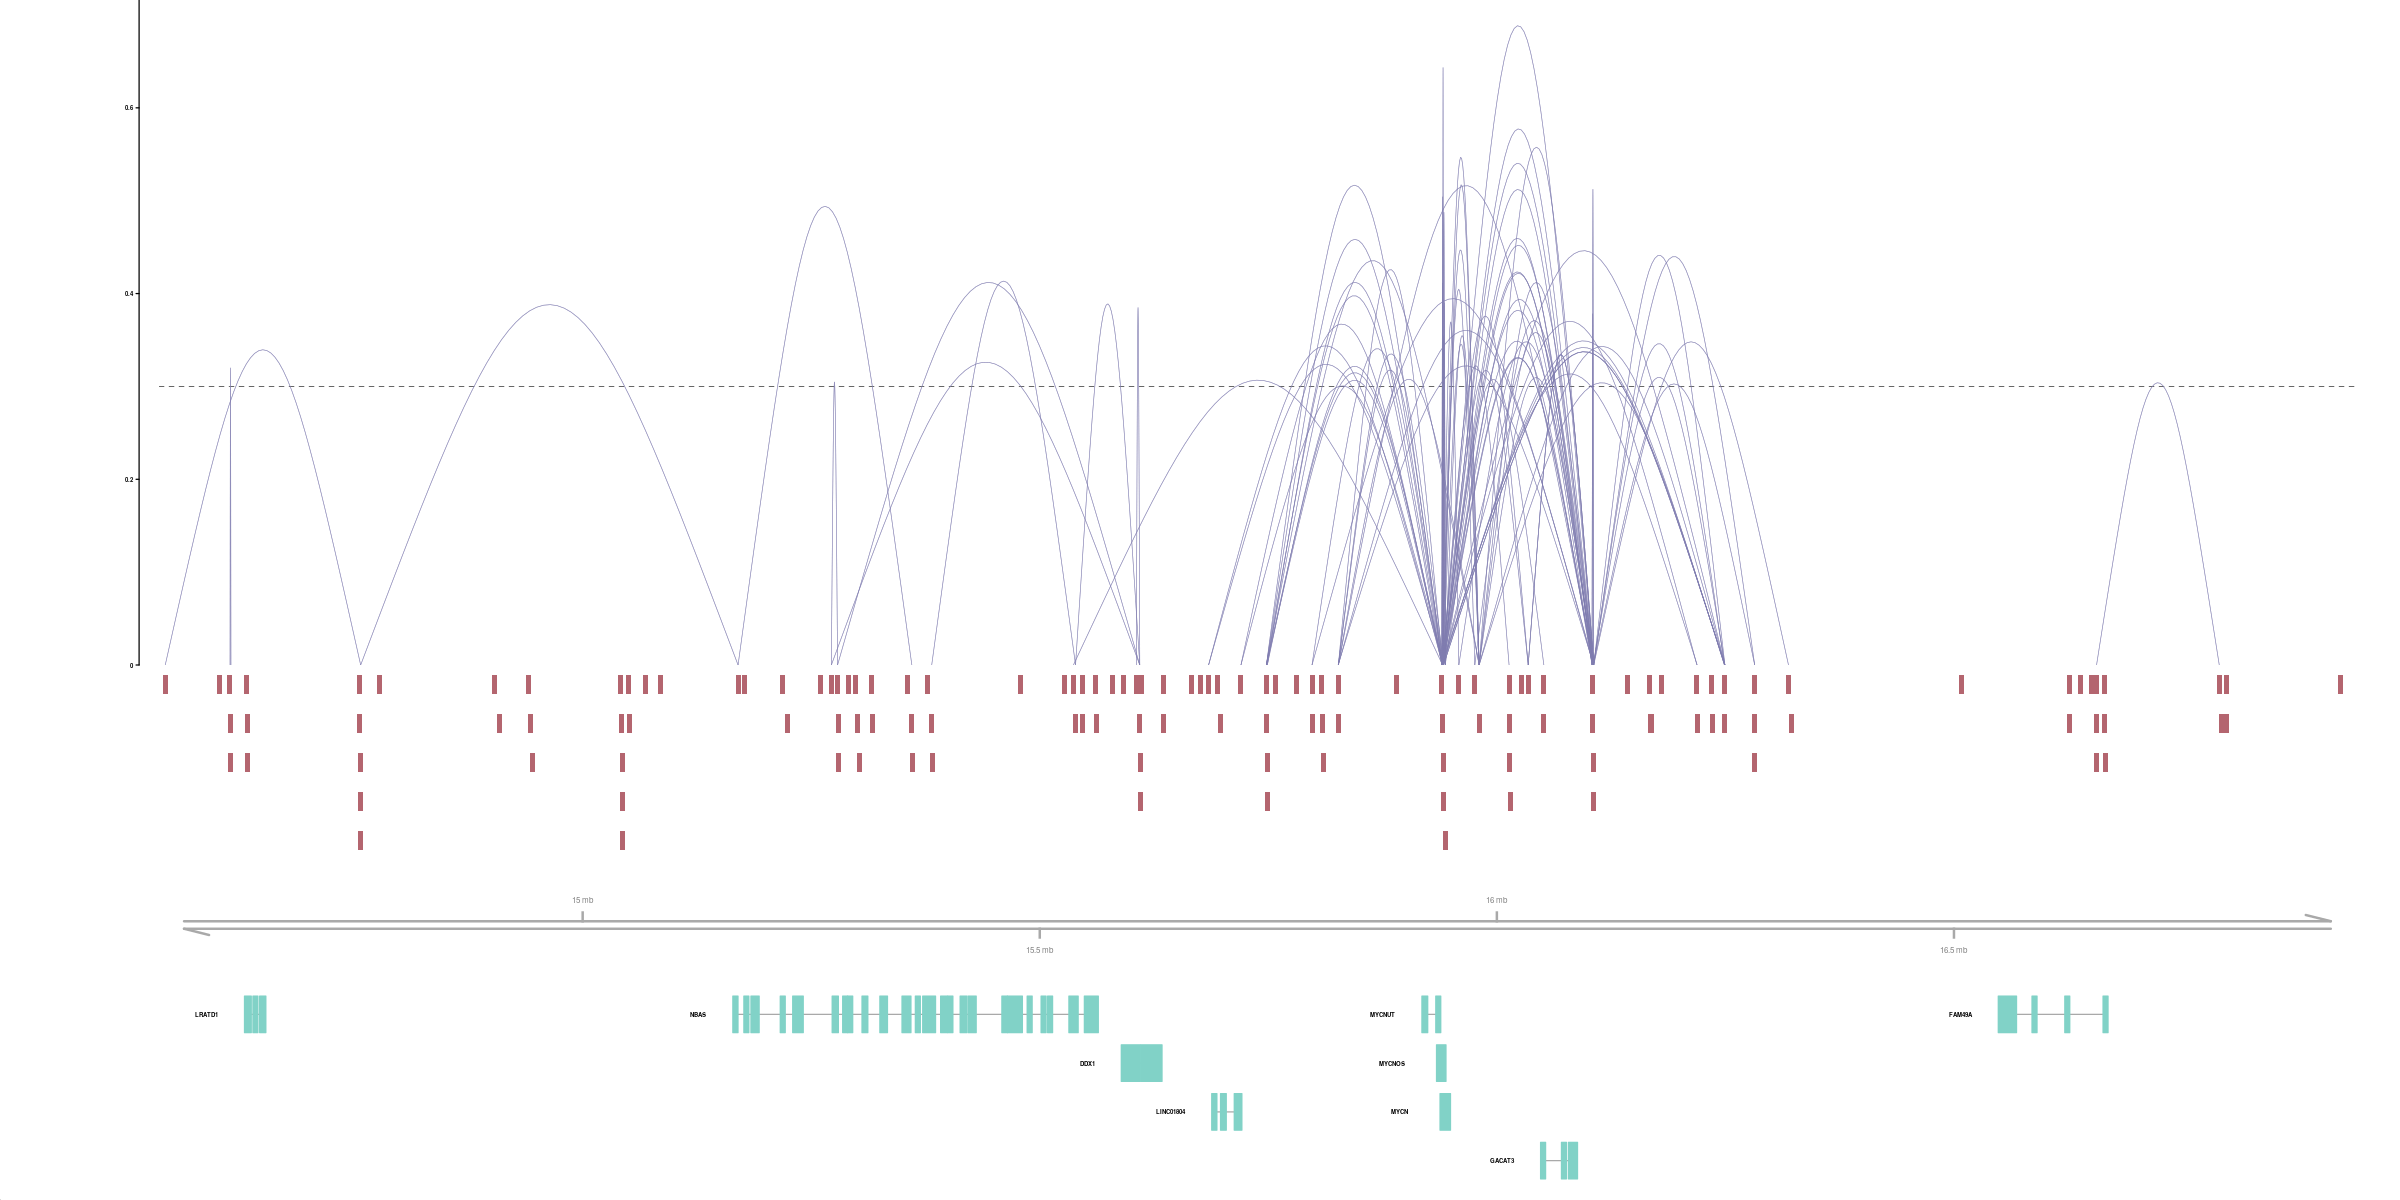

In [1009]:
options(repr.plot.width = 20, repr.plot.height = 10)

plot_connections(high_conns[high_conns$distance>1000,], "chr2", 14536631, 16939531,
                 gene_model = gene_anno, 
                 coaccess_cutoff = .3, 
                 connection_width = .5, 
                 collapseTranscripts = "longest" )

## Prepare Promoters

In [57]:
txdb = makeTxDbFromGFF("/users/surag/kundajelab/scATAC-reprog/resources/refGene/hg38.refGene.gtf.gz", format="gtf")

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
Warning message in .get_cds_IDX(mcols0$type, mcols0$phase):
"The "phase" metadata column contains non-NA values for features of type
  stop_codon. This information was ignored."
OK



In [59]:
tx.hg38 = transcripts(txdb, columns = c("gene_id", "tx_name"))
tx.hg38$gene_id = unlist(tx.hg38$gene_id)
tss.hg38 = unique(resize(tx.hg38, width=1, fix='start'))
tss.hg38

GRanges object with 46236 ranges and 2 metadata columns:
                  seqnames    ranges strand |      gene_id      tx_name
                     <Rle> <IRanges>  <Rle> |  <character>  <character>
      [1]             chr1     11874      + |      DDX11L1    NR_046018
      [2]             chr1     30366      + |    MIR1302-2    NR_036051
      [3]             chr1     69091      + |        OR4F5 NM_001005484
      [4]             chr1    182388      + | LOC102725121    NR_148357
      [5]             chr1    817371      + |       FAM87B    NR_103536
      ...              ...       ...    ... .          ...          ...
  [46232] chrUn_GL000220v1    155996      + |    RNA5-8SN5    NR_003285
  [46233] chrUn_GL000220v1    155997      + |    RNA5-8SN4  NR_146120_8
  [46234] chrUn_GL000224v1    102503      + | LOC100505874    NR_135481
  [46235] chrUn_KI270741v1     44381      + | LOC100505874  NR_135481_2
  [46236] chrUn_KI270753v1     59598      - | LOC105379514  NR_135513_2
  -----

In [61]:
prom.hg38 = promoters(tss.hg38, upstream = 2000, downstream = 500)
prom.hg38

GRanges object with 46236 ranges and 2 metadata columns:
                  seqnames        ranges strand |      gene_id      tx_name
                     <Rle>     <IRanges>  <Rle> |  <character>  <character>
      [1]             chr1    9874-12373      + |      DDX11L1    NR_046018
      [2]             chr1   28366-30865      + |    MIR1302-2    NR_036051
      [3]             chr1   67091-69590      + |        OR4F5 NM_001005484
      [4]             chr1 180388-182887      + | LOC102725121    NR_148357
      [5]             chr1 815371-817870      + |       FAM87B    NR_103536
      ...              ...           ...    ... .          ...          ...
  [46232] chrUn_GL000220v1 153996-156495      + |    RNA5-8SN5    NR_003285
  [46233] chrUn_GL000220v1 153997-156496      + |    RNA5-8SN4  NR_146120_8
  [46234] chrUn_GL000224v1 100503-103002      + | LOC100505874    NR_135481
  [46235] chrUn_KI270741v1   42381-44880      + | LOC100505874  NR_135481_2
  [46236] chrUn_KI270753v1   59

## Peak Sets

In [707]:
peaks_left = sub("_", "-", sub("_", ":", high_conns$Peak1))
peaks_right = sub("_", "-", sub("_", ":", high_conns$Peak2))
head(peaks_left)
head(peaks_right)

[1] "chr10:100006055-100006360" "chr10:100006055-100006360"
[3] "chr10:100006055-100006360" "chr10:100006055-100006360"
[5] "chr10:100006055-100006360" "chr10:100006055-100006360"

[1] "chr10:99775825-99776218" "chr10:99776241-99776466"
[3] "chr10:99779363-99780088" "chr10:99783995-99784700"
[5] "chr10:99788543-99788788" "chr10:99788793-99789003"

In [708]:
# looks like each connection is entered twice
all(sort(peaks_left)==sort(peaks_right))

[1] TRUE

In [709]:
peaks_left_is_gene = seq(1,length(peaks_left)) %in% queryHits(findOverlaps(GRanges(peaks_left), prom.hg38))
peaks_right_is_gene = seq(1,length(peaks_right)) %in% queryHits(findOverlaps(GRanges(peaks_right), prom.hg38))
sum(peaks_left_is_gene)
sum(peaks_right_is_gene)

[1] 460412

[1] 460412

In [1025]:
peak_set = read.table("../20200307_fine_clustering/beds/20200330_gridmap_peakwidthnorm_n20/idx17.bed")
colnames(peak_set) = c("chr", "start", "end")
peak_set = paste(paste(peak_set$chr, peak_set$start, sep=":"), peak_set$end, sep='-')
head(peak_set)

[1] "chr1:816964-817167"   "chr1:817209-818238"   "chr1:1123627-1124185"
[4] "chr1:1124266-1124603" "chr1:1622322-1622527" "chr1:1740789-1741416"

In [1026]:
peaks_left_overlaps_peak_set = seq(1,length(peaks_left)) %in% queryHits(findOverlaps(GRanges(peaks_left), GRanges(peak_set)))
peaks_right_overlaps_peak_set = seq(1,length(peaks_right)) %in% queryHits(findOverlaps(GRanges(peaks_right), GRanges(peak_set)))
sum(peaks_left_overlaps_peak_set)
sum(peaks_right_overlaps_peak_set)

[1] 508486

[1] 508486

In [1027]:
length(peak_set)

[1] 20077

In [1028]:
# find enhancer/non-promoter -> gene links such that enhancer belongs to set
# can look from left to right only since each link is repeated twice 
enhancer_to_gene_link = (peaks_left_overlaps_peak_set&(!peaks_left_is_gene)&(peaks_right_is_gene)) #&(high_conns$distance>10000))
e2g_overlaps = findOverlaps(GRanges(peaks_right[enhancer_to_gene_link]), prom.hg38)
e2g_enhs = peaks_left[enhancer_to_gene_link][queryHits(e2g_overlaps)] # these are the enhancers that link to gene
e2g_genes = prom.hg38[subjectHits(e2g_overlaps)]$gene_id
e2g_uniq = unique(data.frame(e=e2g_enhs, g=e2g_genes)) # uniquify e-g link

sum(enhancer_to_gene_link)
length(unique(e2g_uniq$g))

[1] 42683

[1] 7393

In [1023]:
rev(sort(table(e2g_uniq$g)))[1:40]
# rev(sort(table(e2g_genes)))[200]


     DOK6   COL10A1       PAM    ANKMY2   MIR6512       MCC    COBLL1     CDKL4 
       19        19        18        16        15        14        14        14 
 MGC34796   MIR3973  MIR12132    GLIPR2    ARID1B      TBCK     SAP30   MIR8053 
       13        12        12        12        12        11        11        11 
    MED23 LINC01992 LINC00678    DIRAS3   CCDC192     ASXL3     UTP25    TM9SF3 
       11        11        11        11        11        11        10        10 
    PLCL2   MIR3714  LMO7-AS1 LINC01787     IFRD1    CEP126    CEP112     SULF1 
       10        10        10        10        10        10        10         9 
 PRORSD1P    PNPLA1    OR13J1     NUP93     NUBPL     NRCAM    NFE2L2      MIA3 
        9         9         9         9         9         9         9         9 

In [1015]:
high_conns[enhancer_to_gene_link,][unique(queryHits(findOverlaps(GRanges(peaks_right[enhancer_to_gene_link]), prom.hg38[prom.hg38$gene_id=="MYCN"]))),]

,Peak1,Peak2,coaccess,distance
,<fct>,<fct>,<dbl>,<int>
1994222,chr2_15610095_15610323,chr2_15939531_15940205,0.1094935,329436
1994223,chr2_15610095_15610323,chr2_15940213_15941058,0.1584605,330118
1994231,chr2_15610371_15610674,chr2_15939531_15940205,0.1085074,329160
1994232,chr2_15610371_15610674,chr2_15940213_15941058,0.1576187,329842


In [1016]:
# all peaks that are coaccessible with this set of peaks
links_part_of = peaks_left_overlaps_peak_set # don't need right as each link appears twice
peaks_touched = unique(c(peaks_left[links_part_of], peaks_right[links_part_of]))

In [964]:
length(peaks_touched)
head(peaks_touched)

[1] 31594

[1] "chr10:100060790-100061568" "chr10:100080570-100080771"
[3] "chr10:100280306-100280960" "chr10:100281047-100281248"
[5] "chr10:100493340-100493715" "chr10:100493736-100494187"

In [965]:
# all genes touch
genes_touched = unique(prom.hg38[unique(queryHits(findOverlaps(prom.hg38, GRanges(peaks_touched))))]$gene_id)
length(genes_touched)

[1] 446

In [929]:
# genes_touched

In [930]:
# set of genes that simply intersects with peak set
genes_in_peak_set = unique(prom.hg38[unique(queryHits(findOverlaps(prom.hg38, GRanges(peak_set))))]$gene_id)
length(genes_in_peak_set)

[1] 268

In [931]:
'HNRNPK' %in% genes_in_peak_set

[1] FALSE

In [932]:
length(intersect(genes_touched, genes_in_peak_set))

[1] 195

In [933]:
setdiff(genes_touched, genes_in_peak_set)

[1] "VWA1"          "ATAD3B"        "LOC112267871"  "KIAA1522"     
  [5] "GJB3"          "NCDN"          "MIR3659"       "TMEM269"      
  [9] "ZNF691"        "MAST2"         "HOOK1"         "DNAJC6"       
 [13] "LEPR"          "PDE4B"         "SGIP1"         "LRRC7"        
 [17] "ADGRL2"        "CLCA3P"        "LMO4"          "S1PR1"        
 [21] "SPATA42"       "AMPD2"         "CHI3L2"        "ATP8B2"       
 [25] "PBX1"          "LRRC52"        "LOC440700"     "MIR3658"      
 [29] "LOC101928596"  "GAS5-AS1"      "RASAL2"        "LHX9"         
 [33] "IL19"          "UTP25"         "LINC02474"     "GJC2"         
 [37] "OBSCN"         "LGALS8"        "RNF223"        "INTS11"       
 [41] "NADK"          "LINC01783"     "LOC105376805"  "PSMB2"        
 [45] "TRAPPC3"       "MRPS15"        "GUCA2A"        "NFIA-AS1"     
 [49] "DIRAS3"        "GEMIN8P4"      "EVI5"          "DIPK1A"       
 [53] "LINC01787"     "LOC101928370"  "AKNAD1"        "DRAM2"        
 [57] "MCL1"          "CDC42SE1"      "POGZ"          "S100A10"      
 [61] "S100A5"        "S100A16"       "VAMP4"         "SEC16B"       
 [65] "LAMC1-AS1"     "NCF2"          "LINC01222"     "LINC02608"    
 [69] "LINC02257"     "CAPN8"         "TRIM17"        "MFSD2B"       
 [73] "SNORD53B"      "CLIP4"         "BIRC6"         "VIT"          
 [77] "MAP4K3-DT"     "PRORSD1P"      "ZNF638"        "LINC01127"    
 [81] "LINC01191"     "GYPC"          "R3HDM1"        "MIR128-1"     
 [85] "ZEB2-AS1"      "LINC01412"     "ARL6IP6"       "TBR1"         
 [89] "TTC21B-AS1"    "KLHL41"        "RAPGEF4"       "SP9"          
 [93] "ITGAV"         "COL3A1"        "MIR1245A"      "INPP1"        
 [97] "MFSD6"         "LOC105747689"  "MAP2"          "CPS1"         
[101] "COL4A3"        "UGT1A6"        "ACKR3"         "RNPEPL1"      
[105] "GPR35"         "ANO7"          "LOC101929551"  "PDIA6"        
[109] "LDAH"          "TP53I3"        "CIB4"          "MEMO1"        
[113] "FEZ2"          "CDKL4"         "MAP4K3"        "LOC107985770" 
[117] "C2orf42"       "ADD2"          "EIF2AK3"       "IL1A"         
[121] "ZEB2"          "LOC105373656"  "PRPF40A"       "COBLL1"       
[125] "NFE2L2"        "MIR6512"       "ZNF385B"       "STAT4"        
[129] "CAVIN2"        "CRYGA"         "C2orf80"       "LINC01280"    
[133] "SERPINE2"      "DOCK10"        "SNORD20"       "TNRC17"       
[137] "COL6A3"        "PER2"          "MAB21L4"       "SH3BP5-AS1"   
[141] "PLCL2"         "MIR3714"       "THRB-AS1"      "SLC22A13"     
[145] "CAMP"          "ZNF589"        "NISCH"         "ADAMTS9-AS2"  
[149] "HHLA2"         "TMPRSS7"       "CFAP44-AS1"    "ZBTB20-AS5"   
[153] "ARGFX"         "FBXO40"        "MIR544B"       "RUVBL1-AS1"   
[157] "PPP2R3A"       "CHST2"         "EIF2A"         "PLCH1-AS2"    
[161] "TIPARP"        "ECT2"          "KCNMB2"        "KNG1"         
[165] "IL5RA"         "BHLHE40-AS1"   "THRB"          "NEK10"        
[169] "CLASP2"        "SHISA5"        "RBM5-AS1"      "TNNC1"        
[173] "ARHGEF3"       "FOXP1"         "FILIP1L"       "LINC00882"    
[177] "LOC101929579"  "CCDC191"       "ZBTB20"        "ARHGAP31-AS1" 
[181] "ZNF148"        "C3orf22"       "DNAJB8"        "TMCC1"        
[185] "DZIP1L"        "CP"            "SERP1"         "KCNAB1-AS1"   
[189] "SCARNA7"       "TBL1XR1"       "LIPH"          "LINC02043"    
[193] "DOK7"          "NSG1"          "RBPJ"          "LINC02261"    
[197] "LINC02501"     "MIR8053"       "PDGFRA"        "CEP135"       
[201] "RUFY3"         "SEPTIN11"      "MRPL1"         "LOC105377342" 
[205] "ARHGEF38-IT1"  "ANK2"          "CEP170P1"      "BBS12"        
[209] "SMAD1"         "TRIM2"         "FNIP2"         "RAPGEF2"      
[213] "KLHL2"         "SAP30"         "MIR4276"       "NEIL3"        
[217] "C4orf47"       "KLKB1"         "STX18"         "HS3ST1"       
[221] "TLR1"          "LOC344967"     "LNX1"          "CENPC"        
[225] "SULT1E1"       "BTC"           "ANTXR2"        "HPSE"         
[229] "MIR30

In [1006]:
TMP_PATH = "tmp.txt"
fileConn = file(TMP_PATH)
# writeLines(genes_touched, fileConn)
writeLines(names(rev(sort(table(e2g_uniq$g))))[1:200], fileConn)
close(fileConn)

In [999]:
TMP_PATH = "tmp_all.txt"
fileConn = file(TMP_PATH)
writeLines(unique(prom.hg38$gene_id), fileConn)
close(fileConn)

## mRNA analysis

From Cachiarelli et al 2015

In [934]:
# load bulk RNA-seq data
fpkm = read.table("/users/surag/kundajelab/scATAC-reprog/resources/GSE62777/RNAseq.FPKM.tsv", sep='\t', header=T)
fpkm$gene_id = NULL
fpkm$locus=NULL
tpm = fpkm
tpm[,2:ncol(tpm)] = 1e6*t(t(tpm[,2:ncol(tpm)])/colSums(tpm[,2:ncol(tpm)]))

# removing genes with dup names
tpm = tpm[!duplicated(tpm$gene_short_name),]
rownames(tpm) = tpm$gene_short_name
tpm$gene_short_name = NULL

tpm["GAPDH",]

,hiF.T_P14,X2dd_DOX_plus,X5dd_DOX_plus,X8dd_DOX_plus,X10dd_DOX_plus_SSEA3_pos,X14dd_DOX_plus_SSEA3_pos,X20dd_DOX_plus_TRA_plus,X24dd_TRA_pos_DOX_plus,X24dd_TRA_pos_DOX_minus,hIPSC.T_P10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GAPDH,7803.64,4963.505,3908.693,3839.776,3795.548,3364.503,3032.412,3790.955,5598.224,4731.256


In [935]:
colMedians(as.matrix(tpm[rownames(tpm) %in% genes_touched, ]))

[1] 2.394718 6.133461 7.065995 8.139960 6.524055 6.075330 4.022239 4.389246
 [9] 3.906730 3.693557

In [936]:
colMedians(as.matrix(log2(1+tpm)[rownames(tpm) %in% genes_touched, ]))

[1] 1.763292 2.834602 3.011853 3.192188 2.911510 2.822797 2.328331 2.430084
 [9] 2.294762 2.230682

In [1007]:
colMedians(as.matrix(log2(1+tpm)[rownames(tpm) %in% names(rev(sort(table(e2g_uniq$g))))[1:100], ]))

[1] 0.06465497 0.13408261 0.18451246 0.63240072 0.66379425 1.56924961
 [7] 2.37258484 2.35444047 2.45711427 2.21887091

No id variables; using all as measure variables



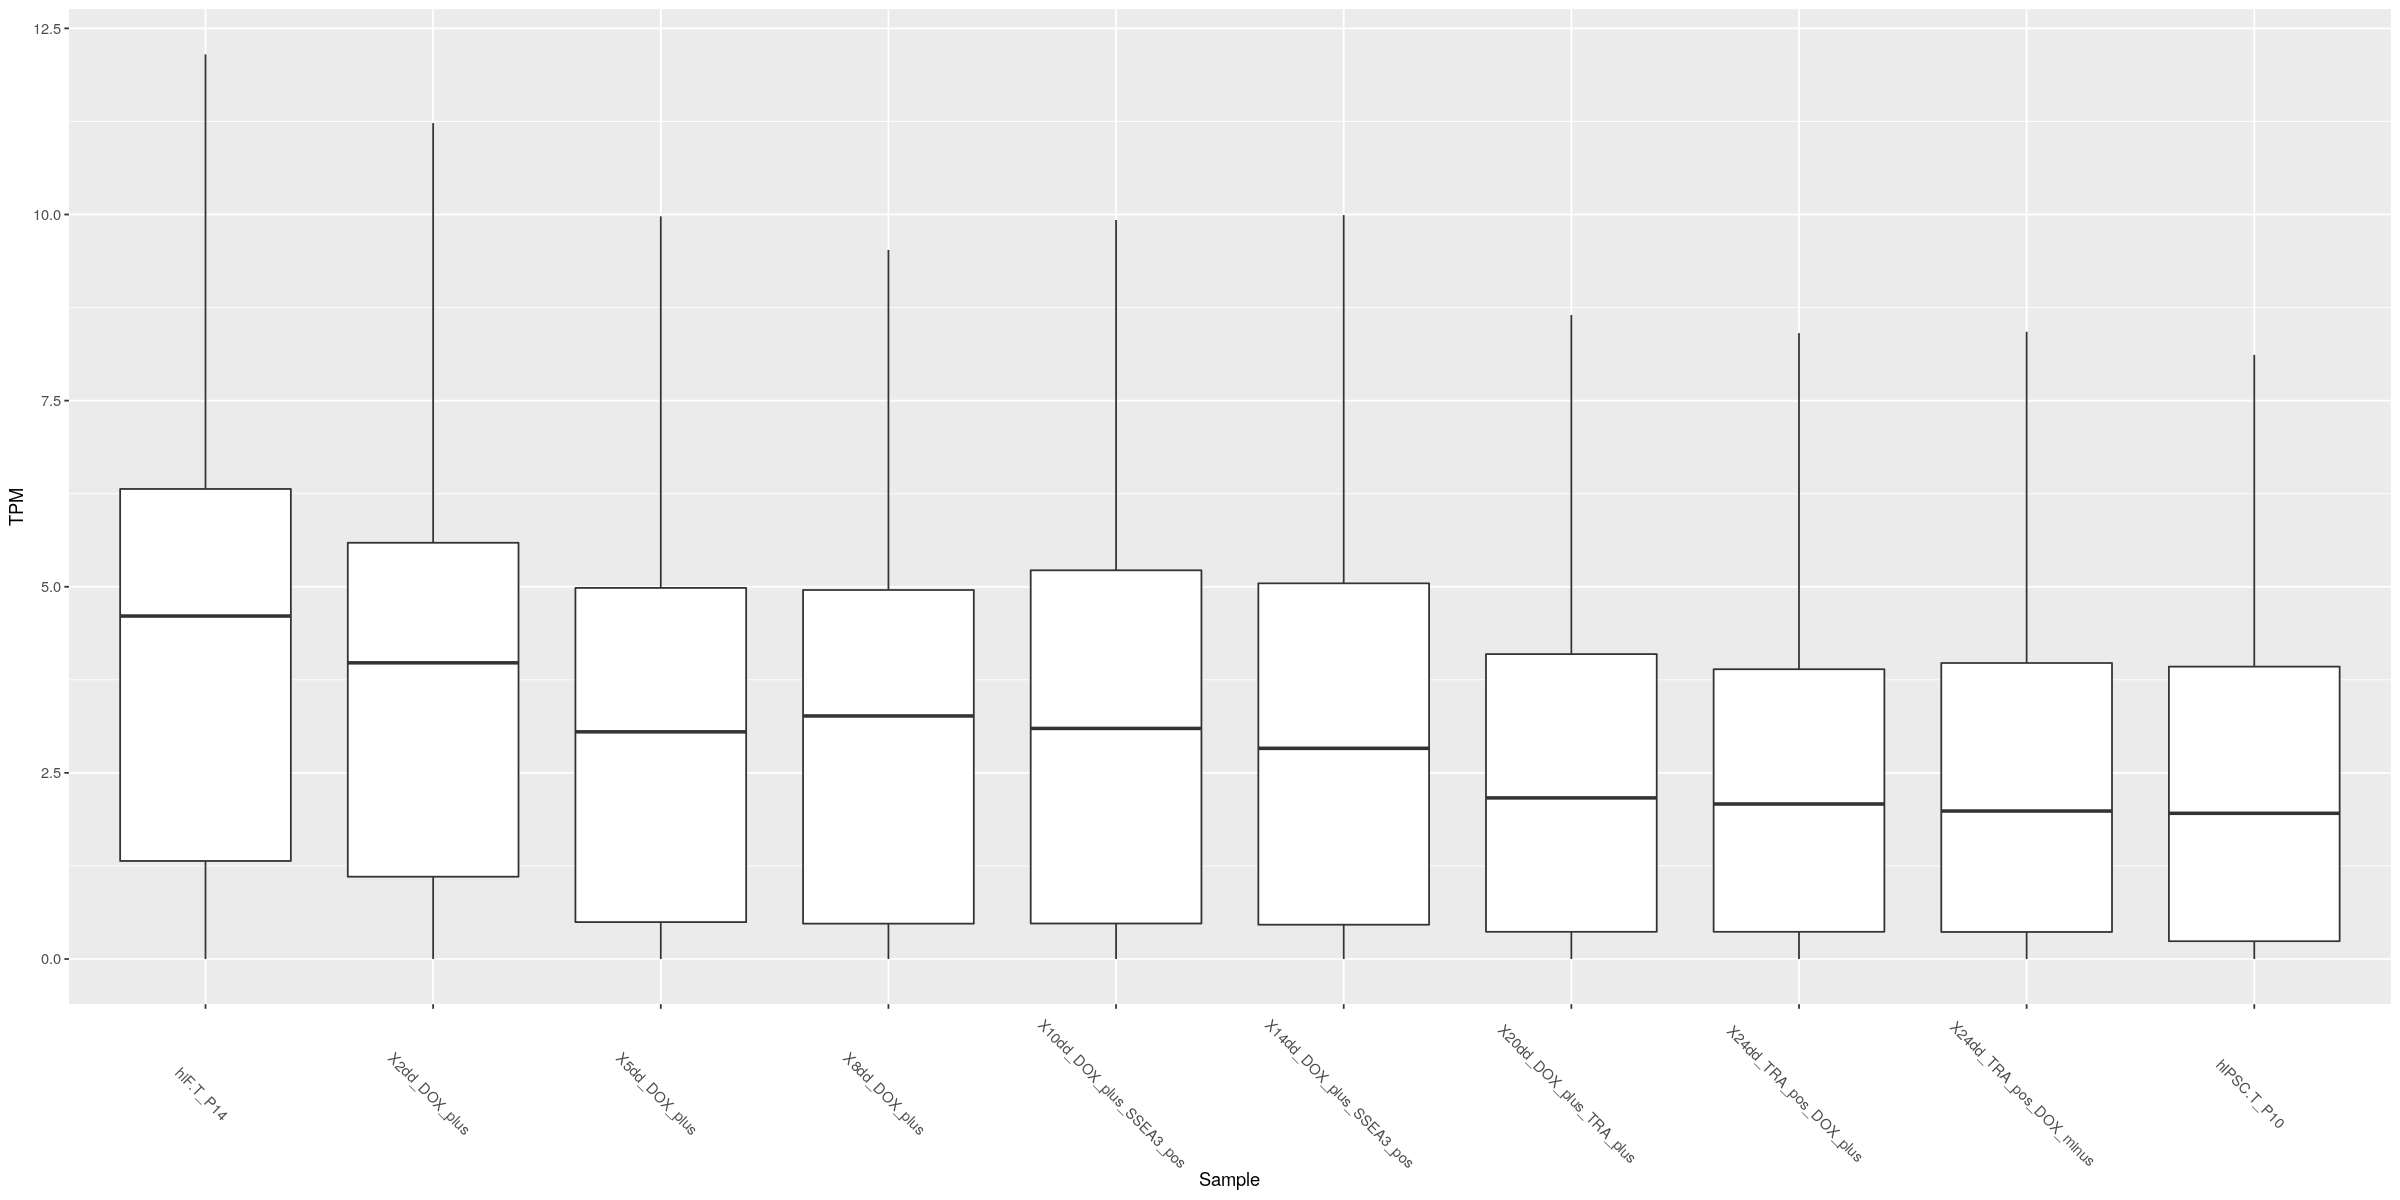

In [1029]:
# options(repr.plot.width = 15, repr.plot.height = 10)

ggplot(melt(log2(1+tpm)[rownames(tpm) %in% names(rev(sort(table(e2g_uniq$g))))[1:100], ]), aes(x=variable, y=value)) +
# ggplot(melt(log2(1+tpm)[rownames(tpm) %in% genes_touched, ]), aes(x=variable, y=value)) +
# ggplot(melt(t(scale(t(log2(1+tpm)[rownames(tpm) %in% genes_touched, ])))), aes(x=Var2, y=value)) +
stat_boxplot() +
theme(axis.text.x = element_text(angle = -45)) +
ylab("TPM") + xlab("Sample")
# geom_boxplot(outlier.shape = NA) + geom_jitter(width = 0.2)
# coord_cartesian(ylim=c(0,8)) 